# Get Quotes

In [6]:
%load_ext autoreload
%autoreload 1
from quotes.Dataframe import Dataframe

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
quote = Dataframe('daily', 'IMO').build()
print(quote.tail())

fetching... IMO
200 status_code
success
            close        date   high    low   open  volume
2018-02-01  31.53  2018-02-01  31.68  31.24  31.24  579723
2018-02-02  29.90  2018-02-02  31.05  29.86  30.46  702378
2018-02-05  28.40  2018-02-05  29.58  28.28  29.40  817366
2018-02-06  28.79  2018-02-06  28.82  28.11  28.16  734931
2018-02-07  28.79  2018-02-07    NaN    NaN    NaN  734931


In [9]:
from talib.abstract import MFI, BOP, AROON, CCI
import numpy as np

inputs = {
            'open': quote['open'].values,
            'high': quote['high'].values,
            'low': quote['low'].values,
            'close': quote['close'].values,
            'volume': quote['volume'].astype('float64').values,
        }
volume = inputs['volume'] #np.array(inputs['volume']).astype('float_')
mfi = MFI(inputs,
    timeperiod=14)

mfi

array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,  63.16492982,  60.08092909,
        55.73638526,  49.75544545,  56.26978223,  74.4455775 ,
        71.14782756,  61.47594816,  59.88685834,  49.97753099,
        49.21480382,  51.74032099,  49.96218683,  49.07167263,
        47.68283686,  40.54923534,  33.90497343,  33.70091371,
        27.28667364,  20.54565978,  17.42473874,  16.81625352,
        17.17914427,  25.02868399,  19.75211712,  19.18159286,
        26.7006794 ,  30.62023247,  34.9071881 ,  39.00233963,
        48.01141343,  56.67243906,  64.91390398,  75.93965535,
        85.21645318,  92.99347642,  86.92954806,  80.83320767,
        77.87762774,  71.22608955,  72.68980841,  74.30307743,
        63.31859106,  56.06047421,  57.33025408,  57.69374375,
        59.67093682,  52.95065337,  48.7990065 ,  38.85

# Add a zscore (how many dev from mean)

In [5]:
from scipy.stats import zscore
quote['log_zscore'] = quote[['log_ret']].apply(zscore)
print(quote[['log_zscore', 'log_ret']].tail())

            log_zscore   log_ret
2017-11-30    0.916808  0.011638
2017-12-01   -1.056119 -0.011809
2017-12-04   -1.825211 -0.020949
2017-12-05    0.602315  0.007900
2017-12-06   -0.638925 -0.006851


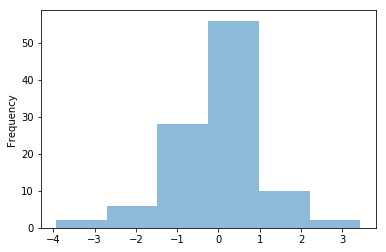

In [6]:
import matplotlib.pyplot as plt

quote['log_zscore'].plot.hist(alpha=0.5, bins=6)
plt.show()

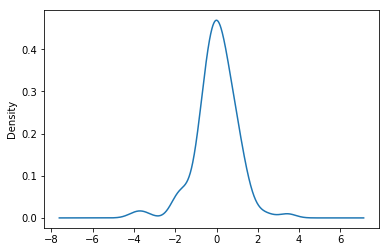

In [9]:
quote['log_zscore'].plot.kde()
plt.show()

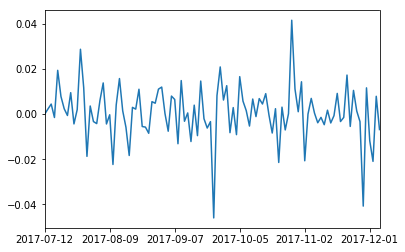

In [8]:
quote['log_ret'].plot()
plt.show()

What about outliers here? See (this article)[http://andreykostenko.com/outliers-and-the-correlation-coefficient/] on outliers affecting correlations.

(This paper)[http://www4.stat.ncsu.edu/~eceyhan/papers/PhysicaA2014.pdf] gave some good info about correlation coefficient (Pearson) and alternatives.

Since we are going to bin the returns, that will take care of outliers.

# Let's bin them
    

In [22]:
import pandas as pd
bins = [-100, -1, 0, 1, 100] # threshold is one standard deviation
labels = ['down', 'flat-down', 'up-flat', 'up']
quote['categories'] = pd.cut(quote['log_zscore'], bins, labels=labels)
quote[['categories', 'log_zscore']]

categories  log_zscore
2017-07-12  flat-down   -0.062448
2017-07-13    up-flat    0.127975
2017-07-14    up-flat    0.311850
2017-07-17  flat-down   -0.188785
2017-07-18         up    1.570489
2017-07-19    up-flat    0.596311
2017-07-20    up-flat    0.137247
2017-07-21  flat-down   -0.113607
2017-07-24    up-flat    0.737176
2017-07-25  flat-down   -0.428211
2017-07-26    up-flat    0.105391
2017-07-27         up    2.356550
2017-07-28    up-flat    0.924078
2017-07-31       down   -1.638534
2017-08-01    up-flat    0.240280
2017-08-02  flat-down   -0.340321
2017-08-03  flat-down   -0.416075
2017-08-04    up-flat    0.450076
2017-08-07         up    1.100241
2017-08-08  flat-down   -0.430208
2017-08-09  flat-down   -0.087022
2017-08-10       down   -1.941379
2017-08-11    up-flat    0.278671
2017-08-14         up    1.263727
2017-08-15    up-flat    0.060662
2017-08-16  flat-down   -0.555973
2017-08-17       down   -1.605992
2017-08-18    up-flat    0.189245
2017-08-21    up-flat    0.123321
2017-08-22    up-flat    0.865255
...               ...         ...
2017-10-25  flat-down   -0.652257
2017-10-26  flat-down   -0.047652
2017-10-27         up    3.439001
2017-10-30    up-flat    0.873691
2017-10-31    up-flat    0.026390
2017-11-01         up    1.143897
2017-11-02       down   -1.803232
2017-11-03  flat-down   -0.062448
2017-11-06    up-flat    0.523381
2017-11-07  flat-down   -0.025093
2017-11-08  flat-down   -0.385177
2017-11-09  flat-down   -0.184378
2017-11-10  flat-down   -0.457588
2017-11-13    up-flat    0.083594
2017-11-14  flat-down   -0.392580
2017-11-15  flat-down   -0.119172
2017-11-16    up-flat    0.709494
2017-11-17  flat-down   -0.339344
2017-11-20  flat-down   -0.184760
2017-11-21         up    1.393688
2017-11-22  flat-down   -0.521768
2017-11-24    up-flat    0.821479
2017-11-27    up-flat    0.052565
2017-11-28  flat-down   -0.343356
2017-11-29       down   -3.494179
2017-11-30    up-flat    0.916808
2017-12-01       down   -1.056119
2017-12-04       down   -1.825211
2017-12-05    up-flat    0.602315
2017-12-06  flat-down   -0.638925

[104 rows x 2 columns]

# Let's generate some CCE's

In [29]:
from scipy.stats import zscore
from correlations.Regression import Regression
def bin_by_zscore(df):
        df['log_zscore'] = df[['log_ret']].apply(zscore)
        bins = [-100, -1, 0, 1, 100] # threshold is one standard deviation
        labels = ['-5', '-1', '1', '5']
        df['binned_change'] = pd.cut(df['log_zscore'], bins, labels=labels).astype(float)
        # convert our labels to floats
        #df.loc[:,'binned_change'] = df['close']
        
fb = Dataframe('daily', 'FB').build()
bin_by_zscore(fb)

msft = Dataframe('daily', 'MSFT').build()
bin_by_zscore(msft)
msft

r2 = Regression.calc_r2(fb['binned_change'], msft['binned_change'], 0, 100)
r2





fetching... FB
200 status_code
success
fetching... MSFT
200 status_code
success


0.19471907362520574

# How does that compare to non-binned

In [30]:
r2 = Regression.calc_r2(fb['log_zscore'], msft['log_zscore'], 0, 100)
r2

0.33881092649501232

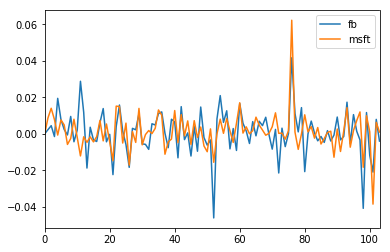

In [33]:
combined = {'fb': fb['log_ret'].values, 'msft': msft['log_ret'].values}
df = pd.DataFrame(data=combined)
df.plot()
plt.show()

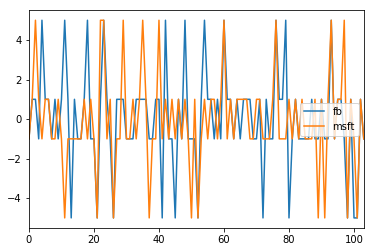

In [34]:
combined = {'fb': fb['binned_change'].values, 'msft': msft['binned_change'].values}
df = pd.DataFrame(data=combined)
df.plot()
plt.show()

# What about if we lag one?

In [37]:
def bin_by_zscore(df):
        df['log_zscore'] = df[['log_ret']].apply(zscore)
        bins = [-100, -1, 0, 1, 100] # threshold is one standard deviation
        labels = ['-5', '-1', '1', '5']
        df['binned_change'] = pd.cut(df['log_zscore'], bins, labels=labels).astype(float)
        # convert our labels to floats
        #df.loc[:,'binned_change'] = df['close']
        
fb = Dataframe('daily', 'FB').build()
bin_by_zscore(fb)

msft = Dataframe('daily', 'MSFT').build()
bin_by_zscore(msft)
msft

rb = Regression.calc_r2(fb['binned_change'], msft['binned_change'], -5, 100)
rz = Regression.calc_r2(fb['log_zscore'], msft['log_zscore'], -5, 100)
rb,rz

fetching... FB
200 status_code
success
fetching... MSFT
200 status_code
success


(0.0090504866421498471, 0.0018341977692571388)

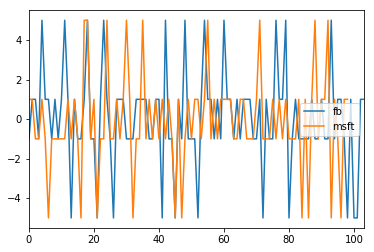

In [40]:
combined = {'fb': fb['binned_change'].values, 'msft': msft['binned_change'].shift(-5).values}
df = pd.DataFrame(data=combined)
df.plot()
plt.show()

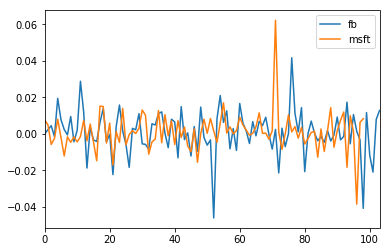

In [41]:
combined = {'fb': fb['log_ret'].values, 'msft': msft['log_ret'].shift(-5).values}
df = pd.DataFrame(data=combined)
df.plot()
plt.show()

In [32]:
from datetime import datetime, timedelta

N = 2

date_N_days_ago = datetime.now() - timedelta(days=N)
print(date_N_days_ago.strftime("%Y-%m-%d"))

2018-02-03


In [1]:
from technical.config import LARGE_CAP, SMALL_CAP, TICKERS

print(TICKERS)

['$SP500', 'AAPL', 'MSFT', 'FB', 'CMCSA', 'INTC', 'CSCO', 'GILD', 'SBUX', 'TXN', 'MDLZ', 'ADBE', 'NVDA', 'FOX', 'FOXA', 'ADP', 'AMAT', 'ATVI', 'EBAY', 'MU', 'ADI', 'DISH', 'INCY', 'EA', 'IMO', 'SIRI', 'LBTYK', 'AAL', 'MYL', 'PAYX', 'ADSK', 'SYMC', 'FITB', 'DLTR', 'SWKS', 'XLNX', 'HBAN', 'CA', 'STX', 'LNG', 'NTAP', 'DISCA', 'DISCK', 'CHRW', 'JBHT', 'EXPD', 'AKAM', 'ETFC', 'OTEX', 'SGEN', 'GT', 'MAT', 'FLEX', 'CDNS', 'STLD', 'ZION', 'ARCC', 'NWSA', 'NWS', 'MRVL', 'JBLU', 'QGEN', 'ON', 'EXEL', 'PACW', 'TTWO', 'CQH', 'SPLS', 'PBCT', 'LOGI', 'BRCD', 'SLM', 'DNKN', 'NUAN', 'SEB', 'ARIA', 'BBRY', 'ISBC', 'CY', 'ICLR', 'ACAD', 'MEOH', 'PTEN', 'ACAS', 'UMPQ', 'AAOI', 'AAON', 'AAT', 'AAWW', 'AAXN', 'ABAX', 'ABCB', 'ABG', 'ABM', 'ACET', 'ACLS', 'ACOR', 'ADC', 'ADTN', 'AEGN', 'AEIS', 'AEL', 'AFAM', 'AGYS', 'AHH', 'AIN', 'AIR', 'AIT', 'AJRD', 'AKR', 'AKS', 'ALE', 'ALG', 'ALGT', 'ALOG', 'ALRM', 'AMAG', 'AMED', 'AMN', 'AMPH', 'AMSF', 'AMWD', 'ANDE', 'ANF', 'ANGO', 'ANIK', 'ANIP', 'APEI', 'APOG', 'ARC

In [1]:
import logging
# create logger with 'spam_application'
logger = logging.getLogger('spam_application')
logger.setLevel(logging.DEBUG)
# create file handler which logs even debug messages
fh = logging.FileHandler('spam.log')
fh.setLevel(logging.DEBUG)

In [2]:
# nothing shows up in the log if I do this:
logger.info('creating an instance of auxiliary_module.Auxiliary')

In [3]:
logger.error('errors show up')

errors show up


In [4]:
logging.basicConfig(filename='spam.log',level=logging.DEBUG)
logging.debug('This message should go to the log file')
logging.info('So should this')
logging.warning('And this, too')